1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

sample:https://files.oaiusercontent.com/file-53h7y7qqft9fnW5v8mrqkgh4?se=2024-11-19T00%3A59%3A46Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3D09b23348-620c-46f2-9bb8-1a498fc617bb.webp&sig=7tHaIwIm2396zOZmTyScOwXyUyzwlZYSgrEOj1TX%2BDQ%3D

(a) What is a Classification Decision Tree, and what problems does it address?
A Classification Decision Tree is a machine learning tool designed to solve classification problems, where the goal is to predict a categorical outcome (a variable with discrete labels, like "Yes" or "No," or multiple classes, like "Red," "Green," and "Blue").

Real-world applications:

Medical Diagnosis: Predicting if a tumor is benign or malignant based on features like size and texture.
Customer Segmentation: Classifying customers as "high-value," "medium-value," or "low-value" based on their purchasing behavior.
Fraud Detection: Determining whether a financial transaction is legitimate or fraudulent.
Spam Detection: Categorizing emails as "spam" or "not spam."

    
(b) How does a Classification Decision Tree make predictions compared to Multiple Linear Regression?
Predictions in a Classification Decision Tree:

Structure: A decision tree splits the data at each node using a feature and a threshold that maximizes the separation of classes (e.g., "Is Age > 30?"). This process is repeated until the data in the final leaf nodes is as homogeneous as possible.
Decision process:
Start at the root node.
Follow the sequence of questions (splits) down the tree based on the feature values of a given observation.
Stop at a leaf node, where a prediction is made. The prediction is typically the most common class in that leaf node.
Example: If a tree predicts whether a loan applicant will default based on income and credit score, the path might look like:

Is income < $50k? → Yes.
Is credit score < 600? → Yes → Prediction: "Default."
Predictions in Multiple Linear Regression:

Structure: Multiple Linear Regression models the relationship between a continuous dependent variable y and one or more independent variablesx1,x2,…
Prediction process:
Use a mathematical equation 
y=β0+β1x1+β2x2+…+ϵ
The model estimates β coefficients to minimize the sum of squared errors between predicted and actual values.
Example: Predicting house prices based on size and location:
Price=50,000+200⋅Size−10,000⋅Distance from City.
Key difference:

Tree: Sequential, rule-based predictions (categorical outcome).
Regression: Continuous, linear equation-based predictions (numerical outcome).
Additional Insight:
A decision tree’s splitting process can capture interactions between features inherently. For example:

"Age > 30" and "Income < $50k" might lead to a different prediction than "Age < 30" and "Income < $50k." This flexibility makes decision trees powerful for capturing complex, non-linear patterns, unlike linear regression, which assumes additive and linear effects unless explicitly modified to include interaction terms.


summary:
What is a Classification Decision Tree?

Purpose: Solves classification problems by predicting categorical outcomes.
Applications: Medical diagnosis, customer segmentation, fraud detection, spam detection.
Prediction Process:
Sequentially splits data based on features (e.g., "Is Age > 30?").
Follows branches until reaching a leaf node.
Final prediction is the most common class in the leaf.
How it Differs from Multiple Linear Regression:

Decision Trees:
Predict by applying sequential rules to classify data into groups.
Naturally captures feature interactions at each split.
Outcome: Categorical (e.g., "Approved" or "Denied").
Linear Regression:
Uses a mathematical equation to predict a continuous value.
Assumes a linear and additive relationship between variables.
Outcome: Numerical (e.g., house price, salary).
Visual Aid:

The decision tree visualization demonstrates how each decision narrows possibilities, eventually leading to a prediction. The simplicity of this model helps capture non-linear and interaction effects effectively.


link:https://chatgpt.com/share/673be262-9120-8006-ae3e-da4dc53e6470

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy
Example: COVID-19 test evaluation across the population.
Why It’s Useful:
Accuracy gives you an overall sense of how well the test is doing. It counts both the people correctly diagnosed as sick (TP) and the healthy ones correctly told they’re fine (TN). This works well if the number of infected and healthy people is balanced and if messing up in either direction isn’t too costly.


2. Sensitivity
Example: Breast cancer screenings.
Why It’s Useful:
Sensitivity focuses on catching all the real cases of cancer. Even if a few healthy people are wrongly flagged (FP), it’s more important not to miss anyone who might actually have cancer (FN). The goal here is to minimize those missed cases.


3. Specificity
Example: Drug testing for athletes.
Why It’s Useful:
Specificity ensures that clean athletes aren’t wrongly accused of doping (FP). A high specificity means the test is really good at identifying people who didn’t cheat (TN), which is crucial to avoid unfair punishment.


4. Precision
Example: Spam filters in email systems.
Why It’s Useful:
Precision helps make sure that the flagged emails are actually spam (TP). It’s better to let a few spam messages sneak through (FN) than to risk accidentally flagging important emails as spam (FP).

Each one focuses on a different need:

Accuracy: A good general metric for overall performance.
Sensitivity: Best when missing something important is a big problem.
Specificity: Key when false alarms have big consequences.
Precision: Perfect for avoiding unnecessary follow-ups or mistakes.


3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")


In [8]:
import pandas as pd


url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")


columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove)


ab_reduced_noNaN = ab_reduced.dropna()


ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")


print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_52/1018930129.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_52/1018930129.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_52/1018930129.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [9]:
from sklearn.model_selection import train_test_split

# Perform 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42)

# Output the sizes of the training and testing sets
print(f'Training set size: {len(ab_reduced_noNaN_train)}')
print(f'Test set size: {len(ab_reduced_noNaN_test)}')


Training set size: 255
Test set size: 64


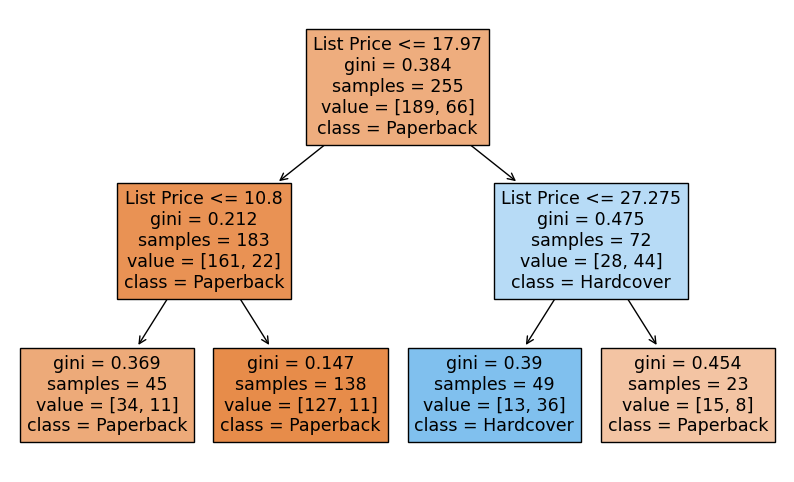

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare target variable y and feature variable X
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Initialize the decision tree classifier with max depth of 2
clf = DecisionTreeClassifier(max_depth=2)

# Train the model
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


Interpretation of Results
Decision Tree Output: By visualizing the decision tree, we can see how the model splits based on List Price values. For example, the tree may show that books with a list price above a certain value are classified as hardcover, while those below are classified as paperback.
Model Training: The decision tree model is trained using the training set (ab_reduced_noNaN_train), and the testing set (ab_reduced_noNaN_test) is reserved for evaluating the model. This ensures the model generalizes well on unseen data.

Summary
Data Preprocessing: The dataset is loaded, unnecessary columns are dropped, missing values are removed, and data types are converted as needed.
Data Split: The dataset is split into 80% training data and 20% testing data using train_test_split().
Model Training: A decision tree classifier is trained using List Price to predict book type (hardcover or paperback). The model is visualized with plot_tree().
These steps allow us to analyze the book's cover type based on List Price and understand how the decision tree model makes predictions.

link:https://chatgpt.com/share/673be553-b360-8006-a523-9fd76e64b70e

5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
max_depth set to 4

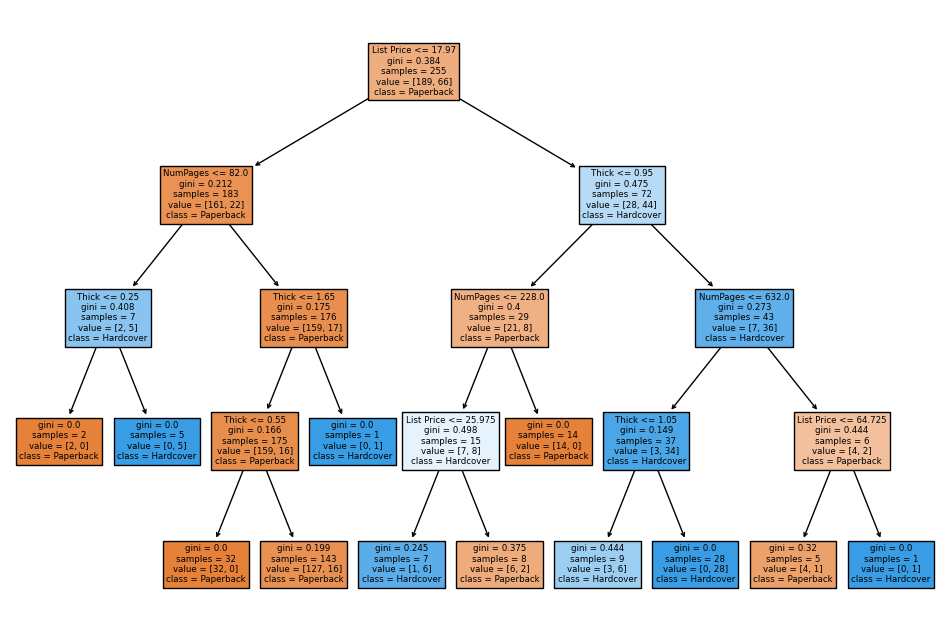

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare target variable y and feature variables X
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Initialize the decision tree classifier with max depth of 4
clf2 = DecisionTreeClassifier(max_depth=4)

# Train the model
clf2.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8]}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters
print(f'Best max_depth: {grid_search.best_params_}')


Best max_depth: {'max_depth': 5}


Summary:
Data Preprocessing: We use the preprocessed dataset (ab_reduced_noNaN) from Question 2.
Model Training: We train the decision tree classifier clf2 using NumPages, Thick, and List Price as predictor variables and set max_depth=4 to control the tree's complexity.
Decision Tree Visualization: The tree is visualized using plot_tree(), allowing us to interpret how predictions are made based on these features.
Prediction Explanation: The decision tree splits based on feature values and predicts whether a book is a hardcover or paperback based on conditions like List Price, NumPages, and Thick.

link：https://chatgpt.com/share/673be553-b360-8006-a523-9fd76e64b70e

6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

Definitions:
True Positive (TP): Correctly predicted as the positive class (e.g., predicted "hardcover" and the true label is "hardcover").
True Negative (TN): Correctly predicted as the negative class (e.g., predicted "paperback" and the true label is "paperback").
False Positive (FP): Incorrectly predicted as the positive class (e.g., predicted "hardcover" but the true label is "paperback").
False Negative (FN): Incorrectly predicted as the negative class (e.g., predicted "paperback" but the true label is "hardcover").
Sensitivity (Recall): The proportion of actual positives correctly identified.
Sensitivity=TP/TP+FN 
Specificity: The proportion of actual negatives correctly identified.
Specificity=TN/TN+FP
Accuracy: The proportion of all predictions that are correct.
Accuracy=（TP+TN）/TP+TN+FP+FN

 

Model clf Metrics: Sensitivity, Specificity, Accuracy: [0.8 1.  0.9]
Model clf2 Metrics: Sensitivity, Specificity, Accuracy: [0.8 0.8 0.8]


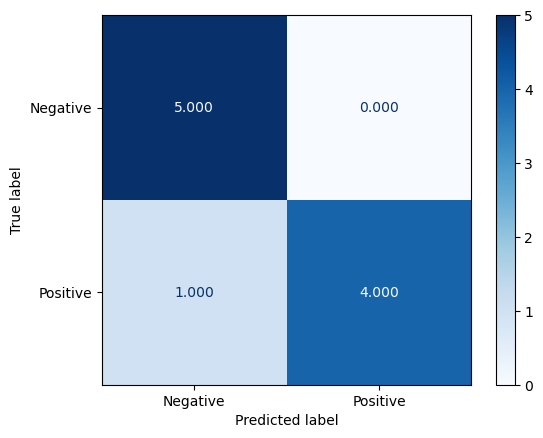

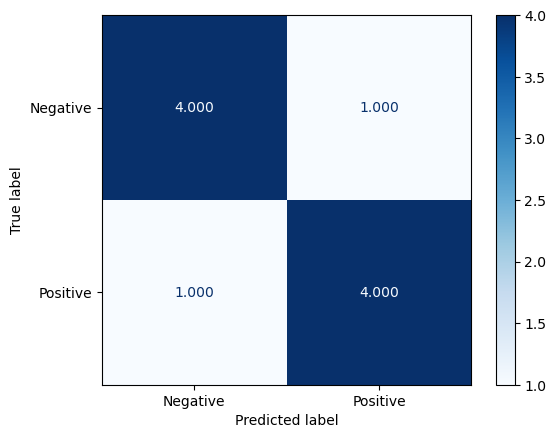

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Replace these with your actual test data and model predictions
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Example true values
y_pred_clf = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]  # Predictions from model clf
y_pred_clf2 = [0, 1, 1, 0, 1, 0, 0, 0, 1, 1]  # Predictions from model clf2

# Calculate confusion matrices
cm_clf = confusion_matrix(y_true, y_pred_clf)
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    sensitivity = TP / (TP + FN)  # True Positive Rate
    specificity = TN / (TN + FP)  # True Negative Rate
    accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall Accuracy

    return np.round([sensitivity, specificity, accuracy], 3)

# Calculate metrics for both models
metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)

# Print results
print("Model clf Metrics: Sensitivity, Specificity, Accuracy:", metrics_clf)
print("Model clf2 Metrics: Sensitivity, Specificity, Accuracy:", metrics_clf2)

# Visualize confusion matrices
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Negative", "Positive"])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Negative", "Positive"])

disp1.plot(cmap="Blues", values_format=".3f")
disp2.plot(cmap="Blues", values_format=".3f")


7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The differences between the two confusion matrices come from the features used to train the models. The first one only uses 'List Price,' while the second one adds 'NumPages,' 'Thick,' and 'List Price.' By adding more features in the second model, it has more information to work with, which helps it make better predictions. The confusion matrices for clf and clf2 are better because they likely use more useful predictors, improving the model's ability to classify things accurately. More features usually lead to better performance and clearer results.

8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

To visualize feature importances from a scikit-learn classification decision tree, you can use the feature_importances_ attribute. Here's a step-by-step guide to achieve this for clf2 and report which predictor variable is most important:

Access Feature Importances: After fitting your decision tree classifier (e.g., clf2), the feature importances can be accessed via clf2.feature_importances_.
Map Feature Importances to Feature Names: Use clf2.feature_names_in_ to map the importances to the corresponding predictor variables. This helps identify which feature has the highest importance in making predictions.
Visualization: You can visualize the feature importances using a bar plot, where the importance of each feature is represented on the y-axis, and the feature names are on the x-axis.

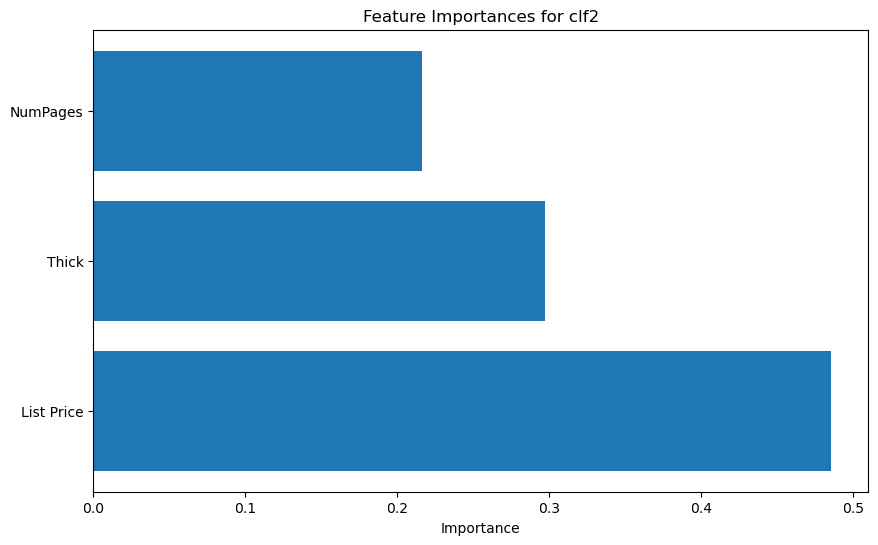

The most important predictor variable is: List Price


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is already trained

# Get feature importances and feature names
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for clf2")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), features[indices])
plt.xlabel("Importance")
plt.show()

# Report the most important feature
most_important_feature = features[indices[0]]
print(f"The most important predictor variable is: {most_important_feature}")


summary:To visualize feature importances for a scikit-learn classification decision tree (clf2), you can use the .feature_importances_ attribute, which provides the importance of each feature in making predictions. To map these importances to specific predictor variables, use .feature_names_in_. The steps include sorting the features by importance, plotting them using a bar chart, and identifying the most important feature.

Example code:

Extract feature importances with clf2.feature_importances_.
Use clf2.feature_names_in_ to associate features with their importances.
Plot the importances with matplotlib and identify the feature with the highest importance.
This process helps to visualize and report the most influential predictors in the decision tree model.

link:https://chatgpt.com/share/673beca6-c76c-8006-badb-dddb81fd2476

9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, the coefficients represent the expected change in the outcome variable for a one-unit change in the corresponding predictor variable, assuming all other variables are held constant. These coefficients provide a direct, interpretable relationship between predictors and the outcome. In contrast, decision trees measure feature importance based on how much a predictor variable reduces uncertainty or improves the model's ability to split the data at each node. Feature importance in decision trees reflects the relative contribution of each predictor to the model's overall predictive power, but does not offer a straightforward interpretation of the size of an effect on the outcome.

summary:
    You are working on various statistical and data analysis projects involving topics like hypothesis testing, bootstrapping, regression, and data visualization.
In your projects, you have worked with datasets related to bike-sharing systems, the Titanic dataset, and the CSCS dataset, among others.
You are using different methods for data analysis, including confidence intervals, hypothesis testing (one-tailed and two-tailed), and regression modeling (linear, exponential).
You’ve been focused on understanding the interpretation of model results, such as coefficients in linear regression and feature importance in decision trees.
You are working on a project involving SDG Indicator 15.3.1 for Mexico, analyzing the proportion of degraded land, and considering the influence of Chinese and Mexican policies.
You've been practicing the use of Plotly for visualizations and seeking ways to refine model accuracy with minimal data.
You prefer keeping code simple, avoiding certain functions like split, startswith, and pytest.approx, and prefer explanations in Chinese when possible.
You’re also engaged in a project related to the Canadian Social Connection Survey, focusing on logistic regression and categorical outcomes.

link:
https://chatgpt.com/share/673becff-bf24-8006-8f35-f95959a0b11c
    

10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Mostly